**A1.4A.22** - Does the system provide the capability to support simulations such as the following?
 (a) Discrete event 
 (b) Monte Carlo (repeated random sampling to obtain the likelihood of a range of results of occurring)
 (c) Agent-based modeling
 (d) Others, please specify

# Discrete Event Simulation

Discrete event simulation involves simulating the behavior and interactions of entities in a system at distinct points in time. 

Following is SimPy simulation that models a bank with multiple service counters and a line of customers. The customers arrive at the bank, wait their turn, get served at one of the counters, and then leave the bank. 


### Simulation Configuration

The simulation of the banking system is configured with the following parameters:

- **Number of Counters**: The number of counters is set to 2. These are the service points or tellers available to serve customers. Each counter can serve one customer at a time. If all counters are occupied, incoming customers have to wait until a counter becomes available.

- **Number of Customers**: The simulation is configured to simulate the arrival of 5 customers at the bank. These customers arrive one after the other, with a specified time interval in between their arrivals.

- **Time Spent in Bank**: Each customer is configured to spend a fixed time of 5 units (could be minutes, seconds, etc. depending on the specific interpretation in the context of your simulation) at the counter. This could represent the time taken by the customer to complete their transaction.

- **Time Between Customers**: The time between the arrival of customers is set to 2 time units. This could represent the average time difference between consecutive customer arrivals at the bank.

This setup gives a simple representation of a queueing system, such as you might find in a bank or a similar service facility. Adjusting the parameters allows you to model different scenarios and understand how changes in these parameters might affect the overall system performance.

In [34]:
!pip install simpy

In [35]:
import simpy

# Define a customer process
def customer(env, name, counter, time_in_bank):
    arrive = env.now  # Record the arrival time
    print('%s arrived at %s' % (name, arrive))  # Print the arrival time

    # Request a counter
    with counter.request() as req:
        yield req  # Wait for counter to be available
        wait = env.now - arrive  # Calculate waiting time

        print('%s waited %s' % (name, wait))  # Print waiting time
        yield env.timeout(time_in_bank)  # Spend time in the bank
        print('%s finished at %s' % (name, env.now))  # Print finishing time

# Define a setup process
def setup(env, num_counters, time_in_bank, between_customers):
    counter = simpy.Resource(env, num_counters)  # Initialize counters
    for i in range(5):  # Create 5 customers
        env.process(customer(env, 'Customer %s' %(i+1), counter, time_in_bank))  # Add customers to environment
        yield env.timeout(between_customers)  # Wait before adding the next customer

env = simpy.Environment()  # Create environment
env.process(setup(env, num_counters=2, time_in_bank=5, between_customers=2))  # Add setup process to environment
env.run()  # Run the simulation


Customer 1 arrived at 0
Customer 1 waited 0
Customer 2 arrived at 2
Customer 2 waited 0
Customer 3 arrived at 4
Customer 1 finished at 5
Customer 3 waited 1
Customer 4 arrived at 6
Customer 2 finished at 7
Customer 4 waited 1
Customer 5 arrived at 8
Customer 3 finished at 10
Customer 5 waited 2
Customer 4 finished at 12
Customer 5 finished at 15


# Monte Carlo simulation

![alt text](https://i.stack.imgur.com/bsYSL.png)

The **Monte Carlo simulation** is a computational technique leveraging **repeated random sampling** to estimate outcomes for complex, non-deterministic processes. One common application of this technique is the estimation of the value of π. Here's how it's done:

### Estimating π using Monte Carlo Simulation

The `monte_carlo_pi` function estimates the value of Pi using the Monte Carlo method, a statistical technique that relies on random sampling. It generates a number of random points (equal to `num_samples`) in a unit square, then counts how many fall within a unit circle. The ratio of points inside the circle to the total number of points, multiplied by 4, yields an approximation of Pi. The higher the number of samples, the more accurate the estimation.

1. **Area of Square**:
    - Given a square circumscribing a unit circle, the side length of the square is twice the radius of the circle (which is 1), so `side = 2*1 = 2`.
    - The area of the square (`A_square`) is given by the formula `A = side^2`.
    - Hence, `A_square = 2^2 = 4`.

2. **Area of Circle**:
    - For a unit circle, the radius `r = 1`.
    - The area of the circle (`A_circle`) is given by the formula `A = πr^2`.
    - Therefore, `A_circle = π*1^2 = π`.

3. **Ratio of the Area of the Circle to the Area of the Square**:
    - This ratio is given by `A_circle/A_square`.
    - Hence, `Ratio = π/4`.

4. **Estimation of π**:
    - The simulation uses a quarter of the unit circle (radius = 1/4) for calculations within a unit square (side length = 1), yielding a ratio of π/4.
    - To obtain the estimated value of π (which corresponds to the area of the unit circle), this ratio is multiplied by 4.
    - Therefore, `Estimated π = Ratio * 4 = π/4 * 4 = π`.

By performing these steps over multiple iterations, the Monte Carlo simulation method can provide a close approximation of π.


In [36]:
import random

def monte_carlo_pi(num_samples):
    inside_circle = 0
    for _ in range(num_samples):
        x, y = random.random(), random.random()
        if x*x + y*y <= 1:
            inside_circle += 1
    return (inside_circle / num_samples) * 4

print(monte_carlo_pi(1000000))  # The more samples we use, the closer we get to the true value of Pi


3.139824


# Markov Chain Monte Carlo (MCMC)  

![alt text](https://i.stack.imgur.com/jt3oB.png)

Markov Chain Monte Carlo (MCMC) is a class of algorithms used in computational statistics to sample from complex probability distributions, especially useful in Bayesian statistics to estimate the posterior distribution of parameters. It generates samples by creating a Markov chain where the stationary distribution is the desired distribution.

It operates in two main stages:

1. **Burn-in Stage**: This is the initial phase, where the algorithm explores the solution space and reaches a stable region, discarding these early samples as they may not represent the target distribution accurately.
2. **Stationary Stage**: In this phase, the algorithm has reached the target distribution and generates dependent samples that reflect this distribution, used for posterior inference.


**Detailed Balance Condition**

1. The detailed balance condition is a property of Markov chains and is essential in many stochastic algorithms such as the Metropolis-Hastings algorithm used in Monte Carlo simulations.

2. It essentially states that, in equilibrium, the probability of transitioning from a state `i` to a state `j` should be the same as the probability of transitioning from `j` to `i`.

3. Mathematically, this can be represented as `P(i) * P(i -> j) = P(j) * P(j -> i)`, where `P(i -> j)` is the transition probability from `i` to `j`.

4. In the Metropolis-Hastings algorithm, the detailed balance condition is satisfied by setting the acceptance probability as `min(1, P(j) / P(i))`.

5. This condition ensures that the samples generated by the algorithm will, given enough time, converge to the target distribution.


**Stationary Property**

1. A stationary distribution of a Markov chain is a probability distribution that remains unchanged in the Markov chain's transitions. 

2. If a Markov chain has a stationary distribution, then regardless of the chain's starting state, its state probabilities will converge to the stationary distribution after a large number of steps.

3. The stationary distribution is a key concept in Markov chain Monte Carlo (MCMC) methods, including the Metropolis-Hastings algorithm.

4. The primary goal of MCMC methods is to construct a Markov chain that has the target probability distribution as its stationary distribution.

5. The Metropolis-Hastings algorithm, for example, generates a sequence of samples. If the chain is run long enough, these samples will be distributed according to the stationary distribution, which is the target distribution.

6. In many practical applications, the chain is run for a "burn-in" period to allow it to approach its stationary distribution before samples are taken.

These are some high-level points about the detailed balance condition and the stationary property in the context of Markov chains and MCMC methods. Understanding these principles can be very useful when working with stochastic algorithms in areas like statistical physics, computational biology, machine learning, and many others.

### MCMC - Metropolis Hastings

Metropolis Hastings is one of the oldest and most well-known MCMC methods. It starts with a random point and then generates a chain of samples. For each step, it proposes a new point and decides whether to accept or reject it based on a rule that ensures that over time, the samples are drawn from the target distribution.

The followign script uses the Metropolis-Hastings algorithm, a Markov chain Monte Carlo (MCMC) method, to generate samples approximating a target distribution, in this case, a normal distribution. It employs a proposal distribution, also normal but centered at the current sample, to suggest new positions in the chain. The new positions are accepted based on a probability derived from the ratio of their likelihood under the target and proposal distributions.

The script runs the algorithm for a specified number of samples, storing each accepted position. Finally, it visualizes the distribution of these generated samples in a histogram and overlays the true target distribution as a comparison. If the algorithm is successful, the histogram should closely resemble the target distribution.

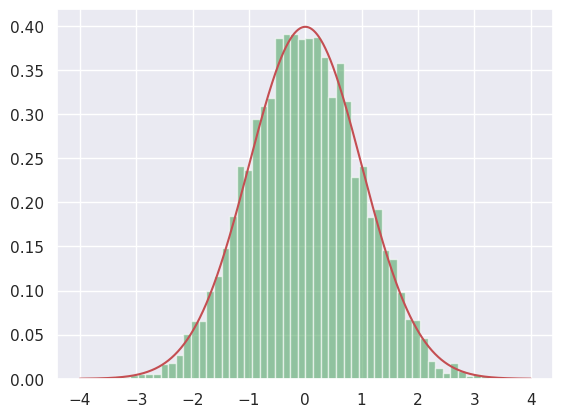

In [37]:
import numpy as np 
import matplotlib.pyplot as plt  

# We define our target distribution, which we'd like our generated samples to follow.
# In this case, it is a standard normal distribution.
def p(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# The proposal distribution `q` is a function that suggests the next potential 
# step in the Markov chain based on the current position `x` and a standard 
# deviation `sigma`. Here it's defined as a normal distribution centered at the 
# current position with the provided `sigma`.
def q(x, sigma):
    return np.random.normal(x, sigma)

# This is the main function, implementing the Metropolis-Hastings algorithm. 
# `p` is the target distribution, `q` is the proposal distribution, `sigma` is 
# the standard deviation for the proposal distribution, and `num_samples` is 
# the number of samples we wish to generate.
def metropolis_hastings(p, q, sigma, num_samples):
    x = np.random.rand()  # Initialize x to a random value
    samples = []  # Initialize an empty list to store our generated samples

    # In this loop, we generate num_samples samples
    for _ in range(num_samples):
        y = q(x, sigma)  # Propose a new position `y`

        # Calculate the acceptance probability as the ratio of the probabilities 
        # of the new and current positions under the target distribution. If this 
        # ratio is greater than 1, we set the acceptance probability to 1.
        acceptance_prob = min(1, p(y) / p(x))

        # Generate a uniform random number
        u = np.random.rand()

        # If u is less than the acceptance probability, accept the new position; 
        # otherwise, stay at the current position
        if u < acceptance_prob:
            x = y

        # Append the current position to our list of samples, whether it's the 
        # new position or the same as before
        samples.append(x)

    # Return the list of samples
    return samples

# Set the standard deviation and the number of samples for the Metropolis-Hastings algorithm
sigma = 1
num_samples = 10000

# Run the Metropolis-Hastings algorithm to generate samples
samples = metropolis_hastings(p, q, sigma, num_samples)

# Plot a histogram of the generated samples, normalized so that it forms a probability density
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')

# Generate a range of x-values to plot the actual target distribution
xs = np.linspace(-4, 4, 1000)
plt.plot(xs, p(xs), 'r')  # Plot the target distribution

# The histogram of the samples should match the actual target distribution if the 
# Metropolis-Hastings algorithm is working correctly.

# Display the plot
plt.show()


# Agent-based modeling

Agent-based modeling is a type of simulation where multiple agents interact. 
Here's a simple predator-prey model using Mesa, a Python library for agent-based modeling.

Let's model a very simple behavior: rabbits randomly wander around, and foxes follow the nearest rabbit. Also, we add a random chance that a rabbit is eaten if a fox ends its turn on the same cell.

For simplicity, we'll make a grid-based world, and limit each animal to moving up, down, left or right by one cell per turn. We'll use Mesa's `Grid` class to handle the grid for us. Each agent can see the environment and other agents in it.

This script simulates a simple ecosystem of foxes and rabbits. The foxes lose energy over time and gain energy by eating rabbits. The rabbits move randomly. If a fox's energy drops to zero, it dies and is removed from the grid.

Note: This is a simple model that doesn't take into account factors like reproduction, realistic movement patterns, etc. It's meant to illustrate the concept of agent-based modeling, rather than accurately model a fox-rabbit ecosystem. Real-world agent-based models can get very complex and can incorporate various different elements and features.



In [24]:
!pip install mesa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 83.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.8/240.8 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 88.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 38.2 MB/s eta 0:00:00
   

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 110.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 35.8 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2


In [38]:
from mesa import Agent, Model
from mesa.space import MultiGrid
from mesa.time import RandomActivation
import random
from mesa.datacollection import DataCollector

# Define Fox agent
class Fox(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.energy = 20  # Initial energy for the fox

    def step(self):
        # Get the fox's neighbors
        # moore=True specifies that the fox uses a Moore neighborhood to determine its neighbors
        # include_center=False specifies that the fox's current cell isn't considered a neighbor
        neighbors = self.model.grid.get_neighbors(
            self.pos,
            moore=True,
            include_center=False)
        
        # Identify any rabbits in the fox's neighbors
        targets = [agent for agent in neighbors if isinstance(agent, Rabbit)]
        
        # If there are rabbits nearby
        if len(targets) > 0: 
            target = random.choice(targets)  # Pick one at random
            self.model.grid.move_agent(self, target.pos)  # Move to the rabbit's cell
            self.energy += 10  # Gain energy from eating the rabbit
            
            # Remove the eaten Rabbit from both the grid and the schedule
            self.model.grid.remove_agent(target)
            self.model.schedule.remove(target)
            
        # Otherwise, if there are no rabbits nearby
        else: 
            self.random_move()  # Move randomly
            self.energy -= 1  # Lose energy
            
            # If the fox runs out of energy, it dies
            if self.energy < 0: 
                self.model.grid.remove_agent(self)
                self.model.schedule.remove(self)

    # Move the fox to a random neighboring cell
    def random_move(self):
        # Get the possible neighboring cells to move to
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,  # Consider diagonally adjacent cells as neighbors
            include_center=False)  # Don't consider current cell as a possible move
        # Choose a random cell to move to
        new_position = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)  # Move to the new cell

# Define Rabbit agent
class Rabbit(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)

    # A rabbit just moves randomly
    def step(self):
        self.random_move()

    # Move the rabbit to a random neighboring cell
    def random_move(self):
        # Get the possible neighboring cells to move to
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,  # Consider diagonally adjacent cells as neighbors
            include_center=False)  # Don't consider current cell as a possible move
        # Choose a random cell to move to
        new_position = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)  # Move to the new cell

# Define the model
class ForestModel(Model):
    
    # Find a new position that is currently unoccupied
    def find_new_position(self):
        # Try every cell in the grid until an empty one is found
        for _ in range(self.grid.width * self.grid.height):
            # Choose a random cell
            x = random.randint(0, self.grid.width - 1)
            y = random.randint(0, self.grid.height - 1)
            # If the cell is empty, return it as the new position
            if self.grid.is_cell_empty((x, y)):
                return (x, y)
        # If no empty cell was found, raise an exception
        raise Exception("No empty cells found")

    def __init__(self, N, width, height):
        self.num_agents = N  # Number of agents of each type (fox and rabbit)
        # Create a 2D grid that wraps around (toroidal)
        self.grid = MultiGrid(width, height, True)
        # Schedule the agents' actions in a random order
        self.schedule = RandomActivation(self)
        
        # Create a DataCollector to gather data from the model
        self.datacollector = DataCollector(
            model_reporters={"TotalFox": self.compute_total_fox,
                             "TotalRabbit": self.compute_total_rabbit}) 

        # Create fox and rabbit agents
        for i in range(self.num_agents):
            # Create a fox
            a = Fox(i, self)
            # Add the fox to the schedule and place it on the grid
            self.schedule.add(a)
            self.grid.place_agent(a, self.find_new_position())
            
            # Create a rabbit
            a = Rabbit(i+self.num_agents, self)
            # Add the rabbit to the schedule and place it on the grid
            self.schedule.add(a)
            self.grid.place_agent(a, self.find_new_position())

    # Compute the total number of foxes currently in the model
    def compute_total_fox(self):
        return sum([isinstance(agent, Fox) for agent in self.schedule.agents])

    # Compute the total number of rabbits currently in the model
    def compute_total_rabbit(self):
        return sum([isinstance(agent, Rabbit) for agent in self.schedule.agents])

    # Perform one step of the model
    def step(self):
        self.datacollector.collect(self)  # Collect data from the current state of the model
        self.schedule.step()  # Advance each agent by one step

# Create an instance of the model with 10 agents of each type and a 10x10 grid
model = ForestModel(10, 10, 10)
# Run the model for 100 steps
for i in range(100):
    model.step()

# Retrieve the collected data as a pandas DataFrame
data = model.datacollector.get_model_vars_dataframe()


Below is a visualization of the results from a simulation run using the Mesa agent-based modeling library. The simulation represents a simplistic predator-prey system where the predators are foxes and the preys are rabbits, living in a forest (represented as a 2D grid).

The plot has the following characteristics:

1. X-axis (Horizontal Axis): This represents the steps of the simulation. Each step is an iteration of the model where all agents (foxes and rabbits) have performed their respective actions.

2. Y-axis (Vertical Axis): This represents the total count of each species (fox or rabbit) in the simulation at a given step.

The plotted lines represent the following:

- The line labeled "Foxes" corresponds to the total count of fox agents at each step of the simulation.
- The line labeled "Rabbits" corresponds to the total count of rabbit agents at each step of the simulation.

The plot enables us to understand the dynamics between the foxes (predators) and rabbits (prey) over time. For example, if the foxes' line suddenly dips, this could mean that a large number of foxes have run out of energy and died. If the rabbits' line suddenly increases, this could mean that they are prospering due to low predation. These inferences however depend on the specific outcomes of each simulation run, and are just illustrative examples.

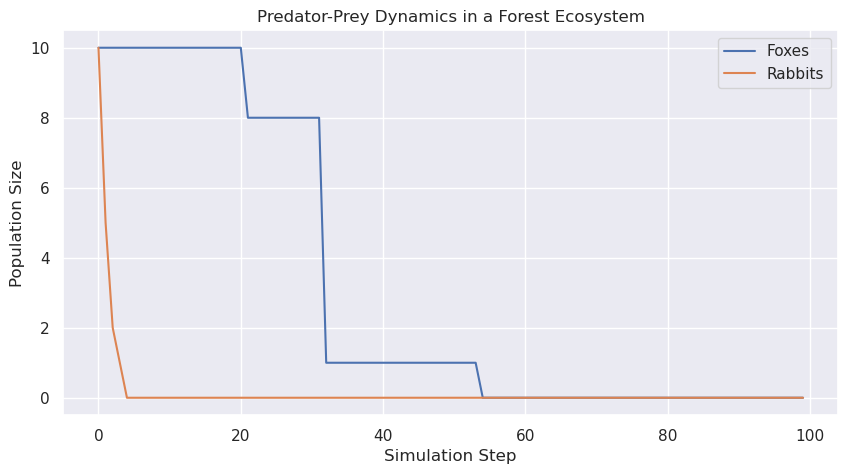

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme
sns.set_theme()

plt.figure(figsize=(10, 5))

# Plot the data using seaborn lineplot
sns.lineplot(data=data["TotalFox"], label="Foxes")
sns.lineplot(data=data["TotalRabbit"], label="Rabbits")

# Adding title and labels
plt.title("Predator-Prey Dynamics in a Forest Ecosystem")  # Title of the plot
plt.xlabel("Simulation Step")  # X-axis label
plt.ylabel("Population Size")  # Y-axis label

# Display the plot
plt.show()
